### Multivariate Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Example: bivariate dataset

- ice_cream sales as a function of temperature and humidity

In [3]:
# coeficients
b0 = 44 #np.random.randint(40, 50)
b1 = 1.037191424 # np.abs(np.random.normal(0.5, 1.2))
b2 = 1.271543234 # np.abs(np.random.normal(1, 1.2))
# variables
def value():
    e0 = np.random.normal(0, 1)
    t = np.random.normal(27, 4)
    h = np.random.normal(50, 5)
    v = b0 + e0 + b1 *t + b2 *h
    return (t, h, v)
b0, b1, b2

(44, 1.037191424, 1.271543234)

In [4]:
ice_cream = pd.DataFrame([value() for i in range(400)], columns = ['temperature', 'humidity', 'sales'])
ice_cream

,temperature,humidity,sales
0,27.134165,50.597052,135.989456
1,31.535201,50.798574,140.970982
2,24.395237,50.737918,132.685433
3,30.903348,57.894084,149.379121
4,29.533762,53.075784,141.072740
...,...,...,...
395,28.495707,41.477415,127.412997
396,24.304169,41.960016,122.116746
397,34.702396,50.326357,141.009463
398,36.585326,47.518513,142.078855


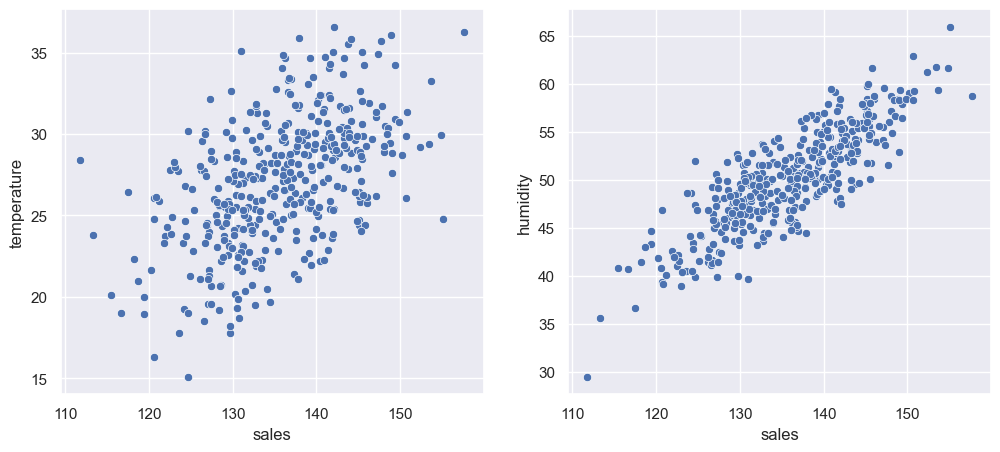

In [5]:
# fem dos plots (temp vs vents) (humitat vs ventes)
_, axs = plt.subplots(1, 2, figsize = (12, 5))
sns.scatterplot(ax = axs[0], data = ice_cream[['sales', 'temperature']], x = "sales", y = "temperature");
sns.scatterplot(ax = axs[1], data = ice_cream[['sales', 'humidity']], x = "sales", y = "humidity");

In [6]:
# train test split ice_cream dos variables independents
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(ice_cream, test_size = 0.2, random_state = 385)
Xtrain.shape, Xtest.shape

((320, 3), (80, 3))

In [7]:
from sklearn.linear_model import LinearRegression

In [27]:
Xtrain[['temperature', 'humidity']].shape

(320, 2)

In [9]:
Xtrain[['temperature', 'humidity']].values.shape

(320, 2)

In [21]:
Xtrain[['temperature', 'humidity']].values.reshape(2, -1).shape

(2, 320)

In [32]:
Xtrain.sales.values.reshape(-1, 1).shape

(320, 1)

In [25]:
# reshape (files, columnes)
Xtrain[['temperature', 'humidity']].values.reshape(2, -1)[0:2]

array([[20.20607889, 51.58257388, 35.71668952, 51.61622507, 30.63202464,
        54.26433953, 30.46833252, 54.87632497, 29.03535227, 55.47363922,
        21.87989912, 53.61373518, 28.17295926, 50.11325554, 27.73248301,
        40.5168837 , 23.72112822, 47.27207886, 24.97100811, 55.75075556,
        32.66598965, 40.05162603, 30.88823564, 43.20072486, 29.62404548,
        55.97536244, 30.04411738, 53.0730711 , 28.85779038, 58.35302766,
        26.36052441, 48.83212648, 25.41789048, 47.79376454, 30.19066906,
        45.85591022, 34.26256948, 56.45512929, 33.295704  , 47.23023205,
        25.36015148, 55.31547433, 23.95128095, 50.1588153 , 24.84009663,
        48.77957113, 24.39213692, 46.45849062, 26.67981309, 50.50348078,
        22.28399254, 52.84015939, 28.20121595, 48.17826419, 31.26169506,
        45.51634524, 22.44775275, 49.89848995, 24.68392592, 43.40596224,
        32.38528659, 50.11810164, 16.32999714, 46.92238384, 21.63861866,
        41.91825177, 31.73108162, 56.00933338, 28.0

In [11]:
Xtrain[['temperature', 'humidity']].values[0:2]

array([[20.20607889, 51.58257388],
       [35.71668952, 51.61622507]])

In [12]:
Xtrain[['temperature', 'humidity']].values.reshape(-1, 2)[0:2]

array([[20.20607889, 51.58257388],
       [35.71668952, 51.61622507]])

In [13]:
# hem de tenir 2 files i n columnes per la independent
# hem de tenir 1 fila i n columnes per a la dependent

# el fit .reshape(-1, 2) amb les dues columnes la y les ventes
# instanciar lr
X = Xtrain['sales'].values.reshape(-1, 1)
Y = Xtrain[['temperature', 'humidity']].values.reshape(-1, 2)
lr = LinearRegression().fit(X, Y)

lr.fit(X, Y)

LinearRegression()

In [16]:
# pintem el model vs els plots anteriors:
# sns.regplot() el del final -> fa els dos de cop
Xtest['predict'] = lr.predict(Xtest[['temperature', 'humidity']].values.reshape(-1, 2))
Xtest.head(2)

ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [ ]:
# mostrar el summary intercept, coeficient b1 i b2, mirar estructura que retorna pq 
# es un array -> lr.coef_[0][1] i 01 lr.intercept([0])
from sklearn.metrics import r2_score,mean_squared_error

# Coeficient
print('Coeficient \u03B21: %.5f' % lr.coef_[0][1])
# Intercept
print('Terme independent \u03B20: %.5f' % lr.intercept_)
# error
X_ = Xtest.sales.values.reshape(-1, 1)
Y_ = Xtest[['temperature', 'humidity']].values.reshape(-1, 2)
print("Coeficient de determinació R^2:", lr.score(X_, Y_))

In [ ]:
# Fem el predict i mostra els punts reals vs ralla valors predits.
# predict y , sales x però que predict y està malament. 

In [ ]:
# mostra evalucació del model

In [ ]:
# analisis dels residus 